<a href="https://colab.research.google.com/github/barathturing/final-hack/blob/main/end_to_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Problem Understanding**
# we need to predict the vechile insurence **claim** is fradulent or not based on the data which given the data contains detailed about 
1. Demographics Data  
2.  Policy Information  
3. Data of Claim 
4. Data of  Vehicle 


Claim related fraud is a huge problem in the insurance industry.It is complex and difficult to identify those unwanted claims. With Random Forest Machine Learning Algorithm, I am trying to troubleshoot and help the General Insurance industry with this problem.


In [130]:
#importing basic libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [131]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
#Reading files using pandas
df1=pd.read_csv("/content/drive/MyDrive/TrainData/Train_Claim.csv")
df2=pd.read_csv("/content/drive/MyDrive/TrainData/Train_Demographics.csv")
df3=pd.read_csv("/content/drive/MyDrive/TrainData/Train_Policy.csv")
df4=pd.read_csv("/content/drive/MyDrive/TrainData/Train_Vehicle_new.csv")
df5=pd.read_csv("/content/drive/MyDrive/TrainData/Traindata_with_Target.csv")

In [133]:
#checking shape of each datasets
print("df1:",df1.shape)
print("df2:",df2.shape)
print("df3:",df3.shape)
print("df4:",df4.shape)
print("df5:",df5.shape)

df1: (28836, 19)
df2: (28836, 10)
df3: (28836, 10)
df4: (28836, 5)
df5: (28836, 2)


In [134]:
#merging all datasets based on "CstomerID"
sample_1=pd.merge(df1,df2)
sample_2=pd.merge(sample_1,df3)
sample_3=pd.merge(sample_2,df4)
master=pd.merge(sample_3,df5)

In [ ]:
master.head()

In [136]:
# Making a list of missing value types
missing_values = ["MISSEDDATA","NA","?","MISSINGVALUE","???",-5,"MISSINGVAL",-1,"N/A","na"]

In [137]:
#we create one missing values list by using that if that comes in any place we replace it with nan
for column in master.columns:
    for missing in missing_values:
        master[column] = np.where(master[column]==missing, np.NaN, master[column])

In [138]:
master.isnull().sum()

CustomerID                        0
DateOfIncident                    0
TypeOfIncident                    0
TypeOfCollission               5162
SeverityOfIncident                0
AuthoritiesContacted              0
IncidentState                     0
IncidentCity                      0
IncidentAddress                   0
IncidentTime                     31
NumberOfVehicles                  0
PropertyDamage                10459
BodilyInjuries                    0
Witnesses                        46
PoliceReport                   9805
AmountOfTotalClaim               50
AmountOfInjuryClaim               0
AmountOfPropertyClaim             0
AmountOfVehicleDamage             0
InsuredAge                        0
InsuredZipCode                    0
InsuredGender                    30
InsuredEducationLevel             0
InsuredOccupation                 0
InsuredHobbies                    0
CapitalGains                      0
CapitalLoss                       0
Country                     

In [139]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  28836 non-null  object 
 1   DateOfIncident              28836 non-null  object 
 2   TypeOfIncident              28836 non-null  object 
 3   TypeOfCollission            23674 non-null  object 
 4   SeverityOfIncident          28836 non-null  object 
 5   AuthoritiesContacted        28836 non-null  object 
 6   IncidentState               28836 non-null  object 
 7   IncidentCity                28836 non-null  object 
 8   IncidentAddress             28836 non-null  object 
 9   IncidentTime                28805 non-null  float64
 10  NumberOfVehicles            28836 non-null  float64
 11  PropertyDamage              18377 non-null  object 
 12  BodilyInjuries              28836 non-null  float64
 13  Witnesses                   287

In [140]:
#checking missing values percent using isnull function 
master.isnull().sum()/len(master)*100 

CustomerID                     0.000000
DateOfIncident                 0.000000
TypeOfIncident                 0.000000
TypeOfCollission              17.901235
SeverityOfIncident             0.000000
AuthoritiesContacted           0.000000
IncidentState                  0.000000
IncidentCity                   0.000000
IncidentAddress                0.000000
IncidentTime                   0.107505
NumberOfVehicles               0.000000
PropertyDamage                36.270634
BodilyInjuries                 0.000000
Witnesses                      0.159523
PoliceReport                  34.002636
AmountOfTotalClaim             0.173394
AmountOfInjuryClaim            0.000000
AmountOfPropertyClaim          0.000000
AmountOfVehicleDamage          0.000000
InsuredAge                     0.000000
InsuredZipCode                 0.000000
InsuredGender                  0.104037
InsuredEducationLevel          0.000000
InsuredOccupation              0.000000
InsuredHobbies                 0.000000


# Imputing Missing Values for both **numeric** and **catagorical**

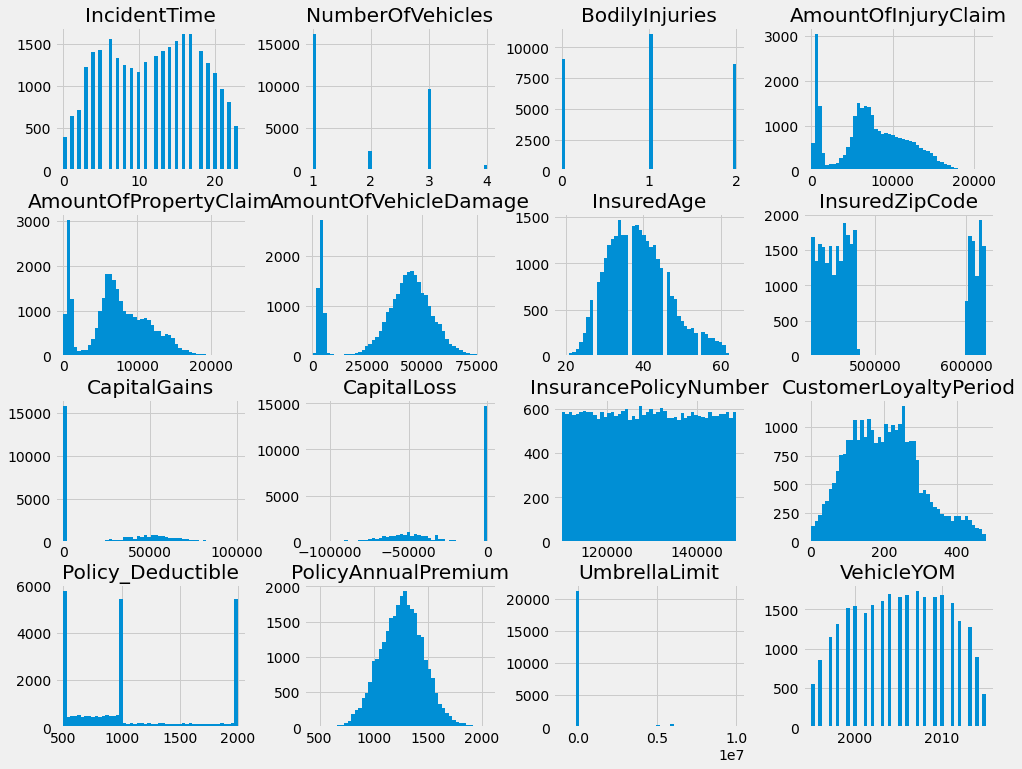

In [142]:
#by using hist graph we can see how data distributed
master.hist(bins=50,figsize=(15, 12))
plt.show()

In [143]:
##  Replace NAN values with most occured category in TypeOfCollission
Mode_Category = master["TypeOfCollission"].mode()[0]
master["TypeOfCollission"].fillna(Mode_Category,inplace=True)

In [144]:
##  Replace NAN values with median in IncidentTime
median=master['IncidentTime'].median()
master['IncidentTime'].fillna(median,inplace=True)

In [145]:
#drop country missing value data 
master.drop(['Country'],axis=1,inplace=True)

In [146]:
##  Replace NAN values with median  in witness
median_1=master['Witnesses'].median()
master['Witnesses'].fillna(median_1,inplace=True)

In [ ]:
##  Replace NAN values with most occured category in police report
#Mode_Category_1 = master["PoliceReport"].mode()[0]
#master["PoliceReport"].fillna(Mode_Category_1,inplace=True)

In [147]:
master['PoliceReport'].fillna('missing',inplace=True)

In [ ]:
master['PoliceReport']

In [149]:
###  Replace NAN values with median in AmountOfTotalClaim
median_2=master['AmountOfTotalClaim'].median()
master['AmountOfTotalClaim'].fillna(median_2,inplace=True)

In [150]:
##  Replace NAN values with most occured category in gender
Mode_Category_2 = master["InsuredGender"].mode()[0]
master["InsuredGender"].fillna(Mode_Category_2,inplace=True)

In [151]:
master.drop(['CustomerID','VehicleID','InsurancePolicyNumber'],axis=1,inplace=True)

In [152]:
###  Replace NAN values with median in PolicyAnnualPremium 
median_3=master['PolicyAnnualPremium'].median()
master['PolicyAnnualPremium'].fillna(median_3,inplace=True)

In [153]:
##  Replace NAN values with most occured category in VehicleMake
Mode_Category_3 = master["VehicleMake"].mode()[0]
master["VehicleMake"].fillna(Mode_Category_3,inplace=True)

In [ ]:
master.isnull().sum().any()

In [155]:
master['PropertyDamage'].fillna('missing',inplace=True)

In [ ]:
master['PropertyDamage']

In [ ]:
#master['PD']=[1 if i=='missing' else 0 for i in master.PropertyDamage ]
#master=master.drop(columns=['PropertyDamage'])

In [ ]:
master.info()

In [158]:
#two numerical feature shows object type change type to numerical
master['AmountOfTotalClaim'] = master['AmountOfTotalClaim'].astype('int')
master['Witnesses']=master['Witnesses'].astype('int')

In [ ]:
master['ReportedFraud'].value_counts()

# Visuvalization 

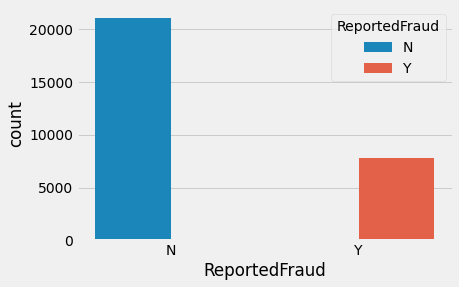

In [28]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='ReportedFraud', data=master, hue='ReportedFraud')

In [25]:
#function for crosstabs
def cross_tab(x,y):
    crtab = pd.crosstab(master[x], master[y])
    return crtab

In [ ]:
#insuredgender vs ReportedFraud
cross_tab('InsuredGender','ReportedFraud')

In [ ]:
sns.catplot(data=master,x='InsuredGender',hue='ReportedFraud',kind='count')

In [29]:
#insuredgender vs ReportedFraud
cross_tab('PoliceReport','ReportedFraud')

ReportedFraud,N,Y
PoliceReport,,
NO,7230,2668
YES,6721,2412
missing,7100,2705


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

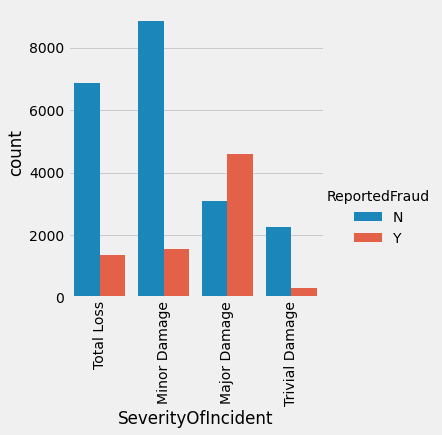

In [44]:
#sevarity of incident vs Reportedfraud 
sns.catplot(data=master,x='SeverityOfIncident',hue='ReportedFraud',kind='count')
plt.xticks(rotation = 90)

In [ ]:
#PropertyDamage vs ReportedFraud
cross_tab('PropertyDamage','ReportedFraud')

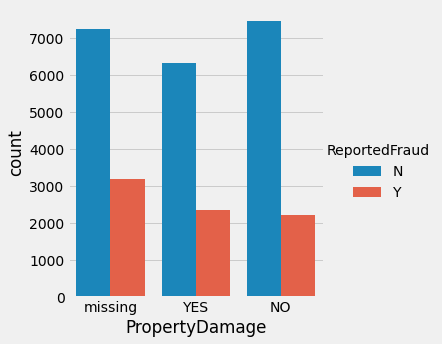

In [45]:
sns.catplot(data=master,x='PropertyDamage',hue='ReportedFraud',kind='count')

In [ ]:
#InsurancePolicyState v/s ReportedFraud
cross_tab('InsurancePolicyState','ReportedFraud')

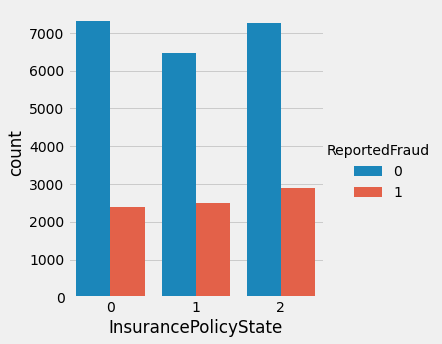

In [256]:
#insurence policy state vs reported fraud 
sns.catplot(data=master,x='InsurancePolicyState',hue='ReportedFraud',kind='count')

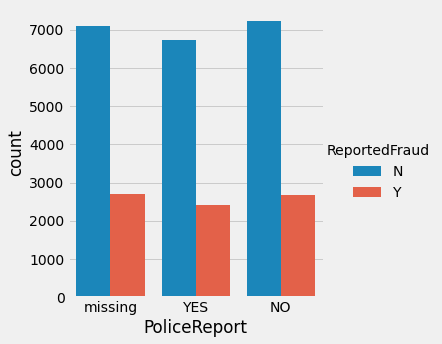

In [42]:
sns.catplot(data=master,x='PoliceReport',hue='ReportedFraud',kind='count')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

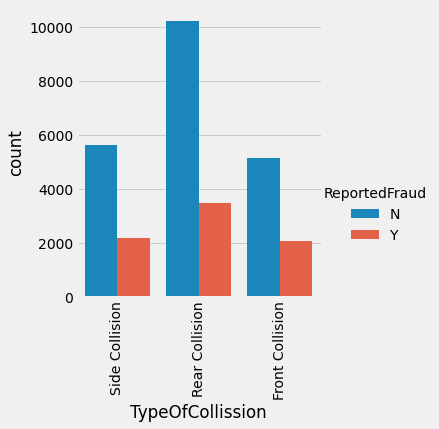

In [35]:
sns.catplot(data=master,x='TypeOfCollission',hue='ReportedFraud',kind='count')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

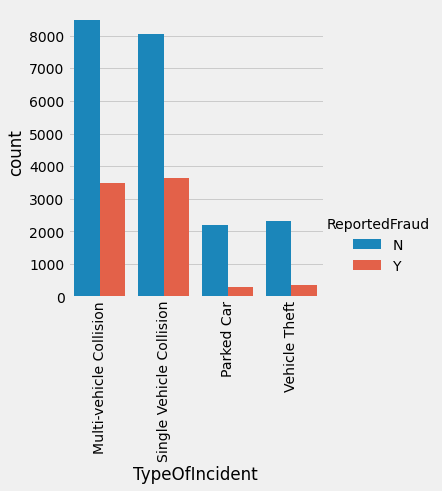

In [38]:
#incidenttype vs ReportedFraud
sns.catplot(data=master,x='TypeOfIncident',hue='ReportedFraud',kind='count')
plt.xticks(rotation = 90)


In [ ]:
#insured education level v/s ReportedFraud
cross_tab('InsuredEducationLevel','ReportedFraud')

In [ ]:
sns.catplot(data=master,x='InsuredEducationLevel',hue='ReportedFraud',kind='count')
plt.xticks(rotation = 90)


In [ ]:
#insured relationship v/s ReportedFraud
cross_tab('InsuredRelationship','ReportedFraud')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

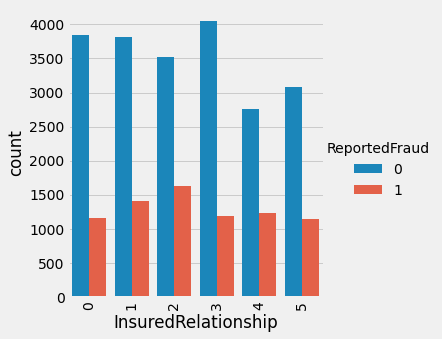

In [257]:
sns.catplot(data=master,x='InsuredRelationship',hue='ReportedFraud',kind='count')
plt.xticks(rotation = 90)

In [ ]:
#authorities contacted v/s fraud reported

cross_tab('AuthoritiesContacted','ReportedFraud')

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

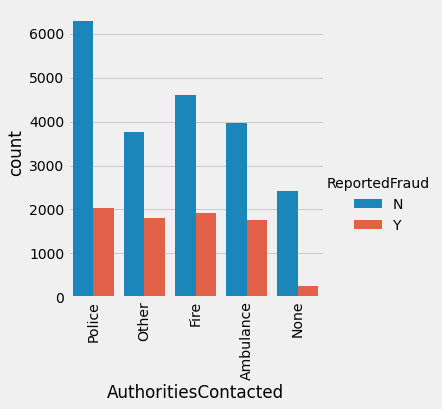

In [39]:
#Authoritiescontacted vs reported fraud 
sns.catplot(data=master,x='AuthoritiesContacted',hue='ReportedFraud',kind='count')
plt.xticks(rotation = 90)

In [ ]:
#incident city vs Reported fraud
sns.catplot(data=master,x='IncidentCity',hue='ReportedFraud',kind='count')
plt.xticks(rotation = 90)

In [ ]:
plt.figure(figsize = (12, 5))
df_temp = master[master.ReportedFraud == 'Y']
sns.set_style('darkgrid')
sns.countplot(x = 'VehicleYOM', data = master)
plt.ylabel('No. of fraud reported')
plt.title('ReportedFraud VS VehicleYOM')
plt.xticks(rotation = 90)

In [ ]:
sns.catplot(data=master,x='InsuredOccupation',hue='ReportedFraud',kind='count')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

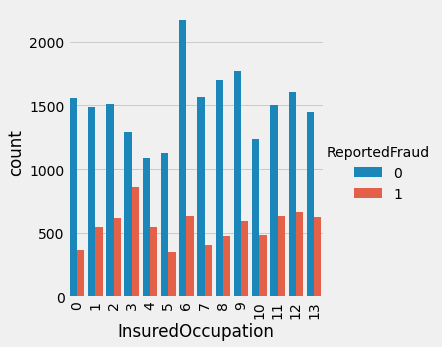

In [259]:
sns.catplot(data=master,x='InsuredOccupation',hue='ReportedFraud',kind='count')
plt.xticks(rotation = 90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

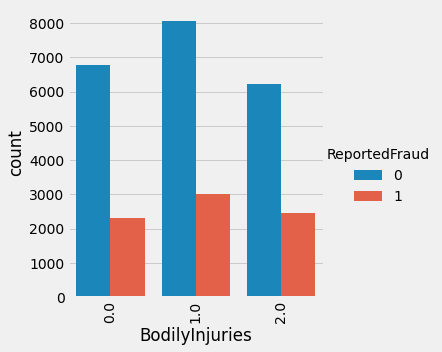

In [258]:
sns.catplot(data=master,x='BodilyInjuries',hue='ReportedFraud',kind='count')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

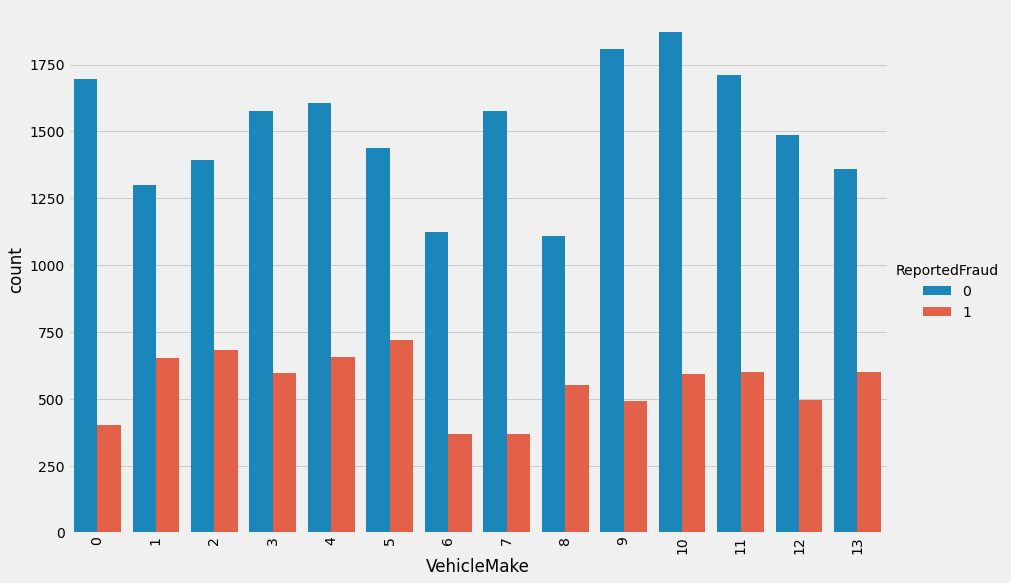

In [260]:
sns.catplot(data=master,x='VehicleMake',hue='ReportedFraud',kind='count',height=8.27, aspect=12.7/8.27)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

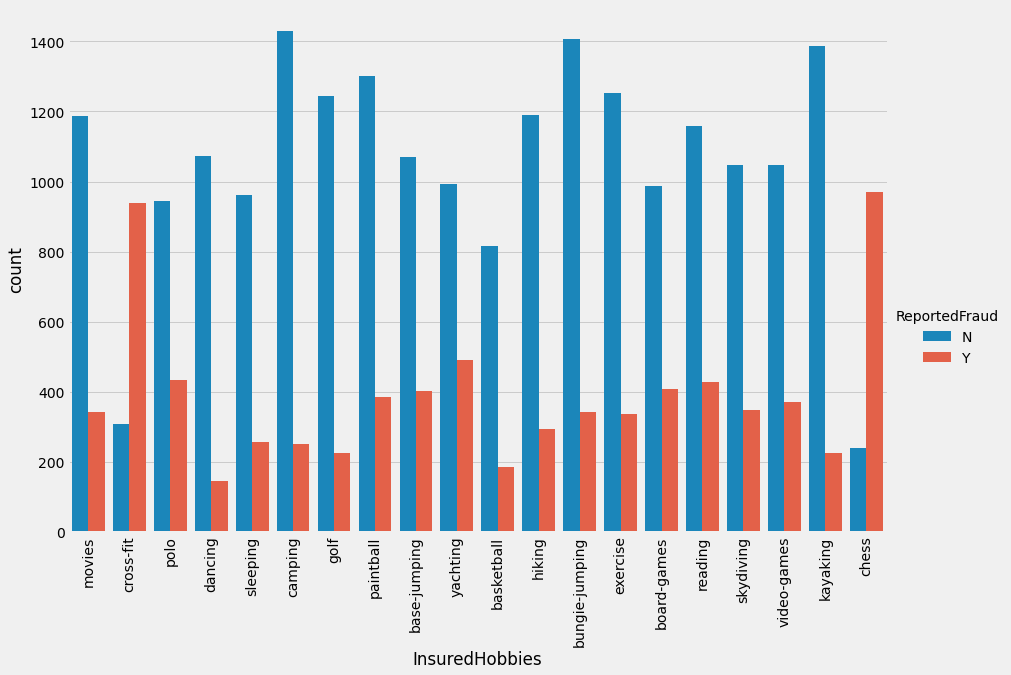

In [64]:
#insuredd hobiees vs reported as fraud
sns.catplot(data=master,x='InsuredHobbies',hue='ReportedFraud',kind='count',height=8.27, aspect=12.7/8.27)
plt.xticks(rotation = 90)

In [ ]:
f, ax=plt.subplots(figsize=(20,18))
corr=master.corr()
sns.heatmap(corr,annot = True)



# catogorical to numerical

In [160]:
master['PropertyDamage']= master['PropertyDamage'].map({'YES':1,'NO':0,'missing':2})

In [161]:
master['PoliceReport']= master['PoliceReport'].map({'YES':1,'NO':0,'missing':2})

In [ ]:
master.select_dtypes(include='object').describe().T

In [163]:
master=master.drop(columns=['DateOfIncident','IncidentAddress','DateOfPolicyCoverage','InsuredZipCode'])

In [ ]:
#catogorical columns 
categorical_columns = master.select_dtypes(include=['object']).columns
categorical_columns

In [ ]:
master.shape

In [166]:
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()

for colum in categorical_columns:
    master[colum]= label.fit_transform(master[colum])  

In [ ]:
master.head()

In [ ]:
master.dtypes

In [ ]:
master.isnull().sum()

In [171]:
x=master.drop('ReportedFraud',axis=1)
y=master['ReportedFraud']
x.shape

(28836, 33)

# test data

In [172]:
#read csv files for test data
df1=pd.read_csv("/content/drive/MyDrive/TestData/Test_Claim.csv")
df2=pd.read_csv("/content/drive/MyDrive/TestData/Test_Demographics.csv")
df3=pd.read_csv("/content/drive/MyDrive/TestData/Test_Policy.csv")
df4=pd.read_csv("/content/drive/MyDrive/TestData/Test.csv")
df5=pd.read_csv("/content/drive/MyDrive/TestData/Test_Vehicle_new.csv")

In [173]:
#checking shape for test data
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(8912, 19)
(8912, 10)
(8912, 10)
(8912, 1)
(8912, 5)


In [174]:
#merging all datasets based on "CstomerID"
sample_1=pd.merge(df1,df2)
sample_2=pd.merge(sample_1,df3)
sample_3=pd.merge(sample_2,df4)
test=pd.merge(sample_3,df5)

In [175]:
test.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust10008,2015-02-05,Multi-vehicle Collision,Front Collision,Minor Damage,Ambulance,State5,City2,Location 1354,4,3,NO,0,0,?,68354,6835,8059,53460,27,471704,FEMALE,High School,adm-clerical,base-jumping,56400,-57000,India,119129,84,1998-05-10,State2,500/1000,2000,1006.00,0,own-child,Vehicle34362,Volkswagen,Passat,1995
1,Cust10010,2015-01-13,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City5,Location 1383,16,1,?,1,1,?,55270,8113,5240,41917,40,455810,FEMALE,MD,prof-specialty,golf,56700,-65600,India,119131,232,2011-11-10,State3,100/300,500,1279.17,0,unmarried,Vehicle17046,Nissan,Ultima,2006
2,Cust10015,2015-01-05,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 2030,20,3,NO,0,1,?,59515,7490,9110,42915,39,461919,MALE,JD,other-service,movies,30400,0,India,119136,218,2010-07-17,State2,250/500,1000,1454.67,1235986,other-relative,Vehicle11038,Suburu,Impreza,2010
3,Cust10020,2015-01-03,Vehicle Theft,?,Trivial Damage,None,State7,City5,Location 1449,10,1,?,2,1,?,4941,494,866,3581,38,600904,FEMALE,Masters,exec-managerial,video-games,68500,0,India,119141,205,2000-09-10,State3,500/500,2000,1287.76,5873212,wife,Vehicle37114,Accura,TL,2009
4,Cust1003,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 1916,7,3,NO,2,3,NO,34650,7700,3850,23100,29,430632,FEMALE,PhD,sales,board-games,35100,0,India,110124,134,2000-09-06,State3,100/300,2000,1413.14,5000000,own-child,Vehicle16771,Dodge,RAM,2007


# **Test data Preprocessing**

In [176]:
# Making a list of missing value types
missing_values = ["MISSEDDATA","NA","?","MISSINGVALUE","???",-5,"MISSINGVAL",-1,"N/A","na"]

In [177]:
#we create one missing values list by using that if that comes in any place we replace it with nan
for column in test.columns:
    for missing in missing_values:
        test[column] = np.where(test[column]==missing, np.NaN, test[column])

In [179]:
test.isnull().sum()

CustomerID                       0
DateOfIncident                   0
TypeOfIncident                   0
TypeOfCollission              1763
SeverityOfIncident               0
AuthoritiesContacted             0
IncidentState                    0
IncidentCity                     0
IncidentAddress                  0
IncidentTime                     7
NumberOfVehicles                 0
PropertyDamage                3199
BodilyInjuries                   0
Witnesses                       12
PoliceReport                  3014
AmountOfTotalClaim               8
AmountOfInjuryClaim              0
AmountOfPropertyClaim            0
AmountOfVehicleDamage            0
InsuredAge                       0
InsuredZipCode                   0
InsuredGender                    8
InsuredEducationLevel            0
InsuredOccupation                0
InsuredHobbies                   0
CapitalGains                     0
CapitalLoss                      0
Country                          4
InsurancePolicyNumbe

In [180]:
test['PropertyDamage'].fillna('missing',inplace=True)
test['PoliceReport'].fillna('missing',inplace=True)

In [ ]:
test['PropertyDamage']


In [ ]:
test['PoliceReport']

In [183]:
test['PropertyDamage']= test['PropertyDamage'].map({'YES':1,'NO':0,'missing':2})

In [184]:
test['PoliceReport']= test['PoliceReport'].map({'YES':1,'NO':0,'missing':2})

In [185]:
##  Replace NAN values with most occured category in TypeOfCollission
Mode_Category = test["TypeOfCollission"].mode()[0]
test["TypeOfCollission"].fillna(Mode_Category,inplace=True)

##  Replace NAN values with median in IncidentTime
median=test['IncidentTime'].median()
test['IncidentTime'].fillna(median,inplace=True)

##  Replace NAN values with median  in witness
median_1=master['Witnesses'].median()
master['Witnesses'].fillna(median_1,inplace=True)

#drop huge no of missing value data 
test.drop(['Country'],axis=1,inplace=True)

##  Replace NAN values with most occured category in police report
#Mode_Category_1 = test["PoliceReport"].mode()[0]
#test["PoliceReport"].fillna(Mode_Category_1,inplace=True)

###  Replace NAN values with median in AmountOfTotalClaim
median_2=test['AmountOfTotalClaim'].median()
test['AmountOfTotalClaim'].fillna(median_2,inplace=True)

##  Replace NAN values with most occured category in gender
Mode_Category_2 = test["InsuredGender"].mode()[0]
test["InsuredGender"].fillna(Mode_Category_2,inplace=True)

###  Replace NAN values with median in PolicyAnnualPremium 
median_3=test['PolicyAnnualPremium'].median()
test['PolicyAnnualPremium'].fillna(median_3,inplace=True)

##  Replace NAN values with most occured category in VehicleMake
Mode_Category_3 = test["VehicleMake"].mode()[0]
test["VehicleMake"].fillna(Mode_Category_3,inplace=True)

In [186]:
test['AmountOfTotalClaim'] = test['AmountOfTotalClaim'].astype('int')

In [187]:
#remove some features which is not important 
test=test.drop(columns=['InsurancePolicyNumber','DateOfIncident','IncidentAddress','DateOfPolicyCoverage','InsuredZipCode','VehicleID'])

In [188]:
customerid=test['CustomerID']
test.drop(['CustomerID'],axis=1,inplace=True)

In [190]:
#catogorical columns 
categorical_columns = test.select_dtypes(include=['object']).columns
categorical_columns

Index(['TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentState', 'IncidentCity', 'Witnesses',
       'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies', 'InsurancePolicyState', 'Policy_CombinedSingleLimit',
       'InsuredRelationship', 'VehicleMake', 'VehicleModel'],
      dtype='object')

In [191]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for columns in categorical_columns:
    test[columns]= label.fit_transform(test[columns]) 

In [ ]:
test.dtypes

In [194]:
test.isnull().sum().any()

False

In [195]:
test.shape

(8912, 33)

# **Scaling The Data**

In [196]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
train_scaled=pd.DataFrame(mm.fit_transform(x))

In [197]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
test_scaled=pd.DataFrame(mm.fit_transform(test))

## **Model Creation**

In [ ]:
x.head()

In [199]:
print(x.shape)
print(test.shape)

(28836, 33)
(8912, 33)


In [201]:
train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,0.000000,1.0,0.666667,1.00,0.666667,0.000000,0.739130,0.666667,1.0,0.5,0.000000,1.0,0.569408,0.625501,0.256485,0.577765,0.355556,1.0,0.500000,0.076923,0.631579,0.564179,0.563456,0.100418,0.0,0.125,0.333333,0.742532,0.090909,0.2,0.076923,0.131579,0.65
1,0.000000,1.0,0.666667,1.00,0.666667,0.666667,0.434783,0.666667,0.5,1.0,0.333333,0.5,0.533519,0.725408,0.250063,0.500862,0.377778,1.0,0.500000,0.923077,0.315789,0.702488,0.563456,0.236402,0.0,0.125,0.333333,0.508226,0.090909,0.2,0.076923,0.131579,0.55
2,0.666667,1.0,0.333333,0.75,0.833333,0.833333,0.956522,0.000000,0.5,1.0,1.000000,0.0,0.580335,0.542191,0.491339,0.546072,0.311111,1.0,0.500000,0.076923,0.736842,0.660697,0.426643,0.347280,1.0,0.750,0.078000,0.581576,0.090909,1.0,1.000000,0.526316,0.20
3,0.666667,1.0,0.333333,0.75,1.000000,0.833333,0.956522,0.000000,0.5,1.0,1.000000,0.0,0.575873,0.559580,0.507098,0.530239,0.377778,1.0,0.500000,0.076923,0.736842,0.476617,0.339334,0.395397,0.5,0.750,0.148000,0.559371,0.090909,0.6,1.000000,0.526316,0.40
4,0.666667,0.5,0.333333,0.25,0.833333,0.833333,0.434783,0.000000,0.0,1.0,0.333333,0.5,0.465226,0.411608,0.305619,0.470378,0.222222,0.0,0.333333,0.230769,0.368421,0.000000,0.626463,0.238494,0.5,0.125,0.000000,0.569381,0.479988,0.8,0.923077,0.210526,0.75


In [202]:
test_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,0.000000,0.0,0.333333,0.00,0.333333,0.166667,0.173913,0.666667,0.0,0.0,0.00,1.0,0.608216,0.325647,0.342965,0.687218,0.177778,0.0,0.333333,0.000000,0.000000,0.561194,0.486949,0.175732,0.5,0.750,1.000000,0.357872,0.083502,0.6,1.000000,0.756757,0.00
1,0.666667,0.5,0.333333,0.25,1.000000,0.666667,0.695652,0.000000,1.0,0.5,0.25,1.0,0.491624,0.386536,0.222998,0.538641,0.466667,0.0,0.666667,0.692308,0.473684,0.564179,0.409541,0.485356,1.0,0.125,0.000000,0.528581,0.083502,0.8,0.692308,0.918919,0.55
2,0.000000,0.5,0.333333,1.00,0.333333,0.166667,0.869565,0.666667,0.0,0.0,0.25,1.0,0.529451,0.356854,0.387693,0.551487,0.444444,1.0,0.500000,0.538462,0.631579,0.302488,1.000000,0.456067,0.5,0.625,0.333333,0.638254,0.200292,0.4,0.846154,0.513514,0.75
3,1.000000,0.5,1.000000,0.50,0.666667,0.666667,0.434783,0.000000,1.0,1.0,0.25,1.0,0.043138,0.023536,0.036854,0.045192,0.422222,0.0,0.833333,0.230769,0.947368,0.681592,1.000000,0.428870,1.0,1.000,1.000000,0.533949,0.638473,1.0,0.000000,0.864865,0.70
4,0.000000,0.5,0.333333,1.00,0.333333,0.166667,0.304348,0.666667,0.0,1.0,0.75,0.0,0.307877,0.366859,0.163844,0.296435,0.222222,0.0,1.000000,0.846154,0.105263,0.349254,1.000000,0.280335,1.0,0.125,1.000000,0.612301,0.555961,0.6,0.307692,0.810811,0.60


In [203]:
from sklearn.tree import DecisionTreeClassifier

In [204]:
dt=DecisionTreeClassifier()

In [205]:
#fitting the model
dt.fit(train_scaled,y)

DecisionTreeClassifier()

In [208]:
from sklearn import tree

In [212]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [235]:
decision_tree=tree.export_graphviz(dt,out_file='tree.dot',feature_names=x.columns,max_depth=2,filled=True)

In [236]:
!dot -Tpng tree.dot -o tree.png

In [ ]:
image=plt.imread('tree.png')
plt.figure(figsize=(20,20))
plt.imshow(image)

In [239]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
rf=RandomForestClassifier()
rf.fit(train_scaled,y)

RandomForestClassifier()

In [240]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
ada=AdaBoostClassifier()
ada.fit(train_scaled,y)

AdaBoostClassifier()

In [241]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(train_scaled,y)

GradientBoostingClassifier()

In [242]:
y_pred=rf.predict(test_scaled)
y1_pred=ada.predict(test_scaled)
y2_pred=gb.predict(test_scaled)

In [243]:
#model 1 randomforest classifier
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [244]:
#model 2 AdaboostBoosclassifier
y1_pred

array([0, 0, 0, ..., 0, 0, 0])

In [245]:
#model 3 GradientBoosting classifier
y2_pred

array([0, 0, 0, ..., 0, 0, 0])

# **Hyperparameter tuning**

In [246]:
from sklearn.model_selection import GridSearchCV

In [247]:
from sklearn.model_selection import KFold
KFold=KFold(n_splits=5)

In [248]:
param_grid = {'n_estimators' : [100,110],
              'max_features' : [3,4],
             'max_depth' : [3,5,7],
              'min_samples_split' : [2,8,4]} 

In [249]:
GSV = GridSearchCV(rf,param_grid,verbose=3,cv=KFold,n_jobs=4)
GSV.fit(train_scaled, y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [3, 5, 7], 'max_features': [3, 4],
                         'min_samples_split': [2, 8, 4],
                         'n_estimators': [100, 110]},
             verbose=3)

In [250]:
GSV.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_split': 4,
 'n_estimators': 110}

In [251]:
random=RandomForestClassifier(n_estimators=110,max_depth=7,min_samples_split=4,max_features=4)
random.fit(train_scaled,y)

RandomForestClassifier(max_depth=7, max_features=4, min_samples_split=4,
                       n_estimators=110)

In [252]:
y_new=random.predict(test_scaled)

In [253]:
#hyperparameter tuned output of randomforest
y_new

array([0, 0, 0, ..., 0, 0, 0])

In [254]:
result=pd.DataFrame({'CustomerID':customerid,'ReportedFraud':y_new})


In [ ]:
result['ReportedFraud'].value_counts()

In [ ]:
result.to_csv('barath_final.csv',index=False)

# **Conclusion**
This project has built a model that can detect auto insurance fraud claim. In doing so, the model can reduces loses for insurance companies. 

Three different Ensembele classifiers were used in this project: Randomrforest,AdaBosst,Gradient boosst .out of these three Random forest give F1.Score 82 .

based on this model the main fraud claims are done by peoples  based on when **SeverityOfIncident** if they mentioned majour damage that peoples involed in fraud claims rather than others this is main insight i got from this model and apart from this some other possibilites  like their **hobbies** and  **relationship** ,**Bodilyinjuries**.thes are some main insights from this model